**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2023**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 1

**Datos de la entrega:** Lunes 25 de setiembre 2023, a más tardar a las 11:59 pm

**Estudiantes:**
- Estudiante_1
- Estudiante_2






# Parte 1.  Series temporales y graficación  (65 puntos)

1. Se adjuntan un archivo en formato PDF titulado: Lectura_Caps_1-6_15. Estudie los capítulos en el PDF, se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo la serie temporal en el archivo: TS_d_1, realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.
1. Considere que el código ejemplo en el PDF podría requerir algún pequeño cambio por un tema de versiones de la biblioteca en el tiempo.


In [209]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 1.1
- Cargue el archivo.
- Muestre los cinco primeros registros.
- Muestre qué tipo de datos es la variable  series

In [210]:
# Cargue el archivo CSV en una variable 'series'
series = pd.read_csv('TS_d_1.csv', header=0)

# Muestre los cinco primeros registros
primeros_cinco_registros = series.head(5)
print("Primeros 5 registros:\n", primeros_cinco_registros)

# Muestre qué tipo de datos es la variable 'series'
tipo_de_datos_series = type(series)
print("\nEl tipo de datos de 'series' es:", tipo_de_datos_series)



Primeros 5 registros:
       fecha  temperatura
0  1/1/2004          5.3
1  2/1/2004          5.6
2  3/1/2004          5.9
3  4/1/2004          6.2
4  5/1/2004          8.4

El tipo de datos de 'series' es: <class 'pandas.core.frame.DataFrame'>


### 1.2
- Muestra el promedio, la mediana y la desviación estándar de los datos

In [211]:
# Calcular el promedio
promedio = series['temperatura'].mean()
print("Promedio de temperatura:", promedio)

# Calcular la mediana
mediana = series['temperatura'].median()
print("Mediana de temperatura:", mediana)

# Calcular la desviación estándar
desviacion_estandar = series['temperatura'].std()
print("Desviación estándar de temperatura:", desviacion_estandar)

Promedio de temperatura: 8.013887134133503
Mediana de temperatura: 7.4
Desviación estándar de temperatura: 3.8639481208695945


### 1.3
- Muestre el promedio para cada uno de los meses del año. Es decir, el promedio para todos los eneros, luego el promedio para todos los febreros, y así sucevivamente.

In [212]:
# Crear una copia del DataFrame original
series_copy = series.copy()

# Asegurarse de que la columna 'fecha' esté en formato de fecha con el nuevo formato "%d/%m/%Y"
series_copy['fecha'] = pd.to_datetime(series_copy['fecha'], format='%d/%m/%Y')

# Crear una nueva columna 'mes' que contenga el número del mes
series_copy['mes'] = series_copy['fecha'].dt.month

# Calcular el promedio de temperatura para cada mes
promedio_por_mes = series_copy.groupby('mes')['temperatura'].mean()

# Mostrar el promedio para cada mes
print("Promedio de temperatura por mes:")
print(promedio_por_mes)


Promedio de temperatura por mes:
mes
1     7.688139
2     7.735815
3     7.874268
4     8.524821
5     8.221762
6     7.273333
7     7.706328
8     8.226898
9     8.821692
10    8.498586
11    7.806769
12    7.776055
Name: temperatura, dtype: float64


### 1.4 
- Utilizando la técnica de Lag Features, cree un DataFrame con los valores y un Lag=5

In [213]:
# Crear una copia del DataFrame original
series_copy = series.copy()

# Crear columnas de lag con un lag de 5 en la copia
lag = 5
for i in range(1, lag + 1):
    series_copy[f'temperatura_lag_{i}'] = series_copy['temperatura'].shift(i)

# Eliminar filas con valores NaN resultantes del lag en la copia
series_copy = series_copy.dropna()

# Mostrar el DataFrame resultante con las columnas de lag
print(series_copy)


           fecha  temperatura  temperatura_lag_1  temperatura_lag_2  \
5       6/1/2004         7.90               8.40               6.20   
6       7/1/2004         7.60               7.90               8.40   
7       8/1/2004         7.70               7.60               7.90   
8       9/1/2004         7.10               7.70               7.60   
9      10/1/2004         6.80               7.10               7.70   
...          ...          ...                ...                ...   
4744  27/12/2016         9.99              10.30              10.60   
4745  28/12/2016         8.35               9.99              10.30   
4746  29/12/2016         4.68               8.35               9.99   
4747  30/12/2016        17.80               4.68               8.35   
4748  31/12/2016         9.64              17.80               4.68   

      temperatura_lag_3  temperatura_lag_4  temperatura_lag_5  
5                  5.90               5.60               5.30  
6                  

### 1.5
- Utilizando la técnica de rolling window, cree un DataFrame con los valores, y un ancho de ventana de 3. Tenga las columnas: 'mínimo','media','máximo','t+1'

In [214]:
# Crear una copia de la variable series para trabajar con ella sin modificar la original
series_copy = series.copy()

# Calcular los valores mínimo, media y máximo en la ventana de 3 días
window_width = 3
series_copy['minimo'] = series_copy['temperatura'].rolling(window=window_width).min()
series_copy['media'] = series_copy['temperatura'].rolling(window=window_width).mean()
series_copy['maximo'] = series_copy['temperatura'].rolling(window=window_width).max()

# Desplazar los valores de temperatura para t+1
series_copy['t+1'] = series_copy['temperatura'].shift(-1)

# Eliminar filas con valores NaN resultantes del rolling window y del desplazamiento
series_copy = series_copy.dropna()

# Mostrar el DataFrame resultante con las columnas calculadas
print(series_copy)


           fecha  temperatura  minimo      media  maximo    t+1
2       3/1/2004         5.90    5.30   5.600000    5.90   6.20
3       4/1/2004         6.20    5.60   5.900000    6.20   8.40
4       5/1/2004         8.40    5.90   6.833333    8.40   7.90
5       6/1/2004         7.90    6.20   7.500000    8.40   7.60
6       7/1/2004         7.60    7.60   7.966667    8.40   7.70
...          ...          ...     ...        ...     ...    ...
4743  26/12/2016        10.30   10.30  13.500000   19.60   9.99
4744  27/12/2016         9.99    9.99  10.296667   10.60   8.35
4745  28/12/2016         8.35    8.35   9.546667   10.30   4.68
4746  29/12/2016         4.68    4.68   7.673333    9.99  17.80
4747  30/12/2016        17.80    4.68  10.276667   17.80   9.64

[4746 rows x 6 columns]


### 1.6
- A la variable series, aplíquele la instrucción series.plot(). 
- ¿Qué puede decir del comportamiento de los datos según este gráfico?

¿Qué puede decir del comportamiento de los datos según este gráfico?
El gráfico muestra  la temperatura registrada en una fecha específica a lo largo de los años 2004-2016
        La posición vertical (eje Y) del punto indica la magnitud de la temperatura en ese día.
        La posición horizontal (eje X) del punto indica cuándo se tomó la medición de temperatura.
Es dificil fijarnos excatamente en una fecha especifica en el gráfico ya que son muchos valores de tempertatura, pero permite analizar patrones estacionales, 
tendencias a largo plazo y variaciones en las temperaturas.
En general el comportamiento de las temperaturas varia a lo largo del tiempo pero en rangos de tiempo se mantienen agrupadas en bajas o altas, 
lo que puede indicar las estaciones  y en los ultimos anhos varia mas el rango de temperaturas
Tambien se observan picos o valores extremos de las temperaturas. 


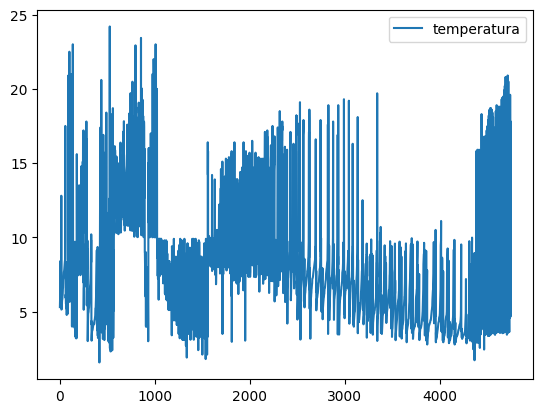

In [215]:
series.plot()

comentario = """¿Qué puede decir del comportamiento de los datos según este gráfico?
El gráfico muestra  la temperatura registrada en una fecha específica a lo largo de los años 2004-2016
        La posición vertical (eje Y) del punto indica la magnitud de la temperatura en ese día.
        La posición horizontal (eje X) del punto indica cuándo se tomó la medición de temperatura.
Es dificil fijarnos excatamente en una fecha especifica en el gráfico ya que son muchos valores de tempertatura, pero permite analizar patrones estacionales, 
tendencias a largo plazo y variaciones en las temperaturas.
En general el comportamiento de las temperaturas varia a lo largo del tiempo pero en rangos de tiempo se mantienen agrupadas en bajas o altas, 
lo que puede indicar las estaciones  y en los ultimos anhos varia mas el rango de temperaturas
Tambien se observan picos o valores extremos de las temperaturas. """
print(comentario)

### 1.7

- Agrupe los datos y muestre un gráfico similar al de la seccion 6.4 de las lecturas (Stacked lines plots).  
- ¿Puede hacer algún comentario del comportamiento anual de los datos?

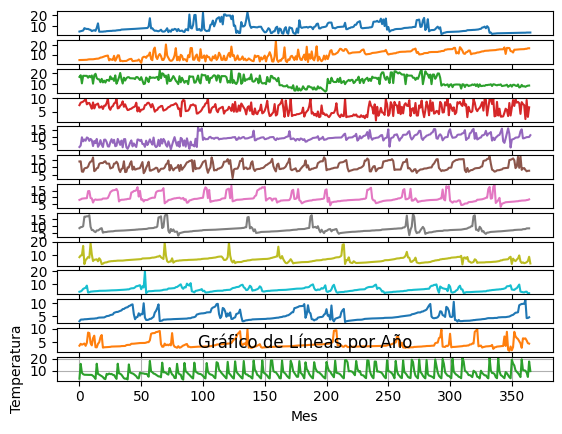


Comentario del comportamiento anual de los datos:
Este código agrupa los datos por año ('A') y crea un Stacked lines plots con los promedios de temperatura por año
para facilitar la comprension de la variación de las tempertauras anuales
El gráfico muestra que la temperatura varia constantemente generando picos, por ejemplo en el 2016 se registra
la tempertaura promedio mas alta y a partir del 2009 al 2015 desciende de forma casi lineal



In [229]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV (asegúrate de que el archivo TS_d_1.csv esté en el mismo directorio)
series = pd.read_csv('TS_d_1.csv', header=0)

# Asegurarse de que la columna 'fecha' esté en formato de fecha con el nuevo formato "%d/%m/%Y"
series['fecha'] = pd.to_datetime(series['fecha'], format='%d/%m/%Y')

# Establecer la columna 'fecha' como índice (importante para trabajar con series temporales)
series.set_index('fecha', inplace=True)

# Agrupar los datos por año ('A') y almacenar las observaciones de cada año en un DataFrame
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

# Crear un gráfico de líneas con una línea por cada año
for name, group in groups:
    year_data = group['temperatura'].values
    if len(year_data) == 365:  # Si el año tiene 365 días, agregar un NaN al final
        year_data = np.append(year_data, np.nan)
    years[name.year] = year_data

years.plot(subplots=True, legend=False)
plt.xlabel('Mes')
plt.ylabel('Temperatura')
plt.title('Gráfico de Líneas por Año')
plt.grid(True)
plt.show()


comentario = """

"""

print(comentario)


### 1.8
- Muestre el histograma de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


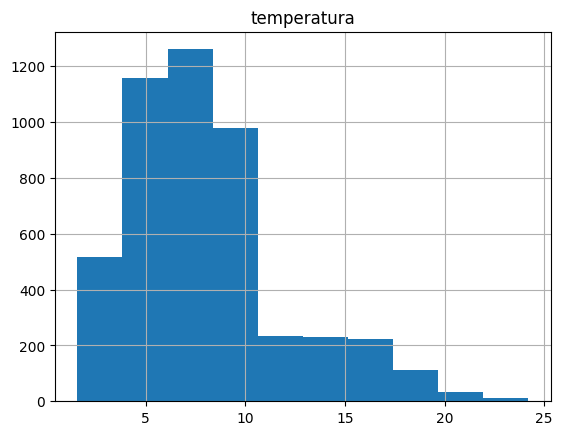


Comentario del comportamiento de los datos:
Los datos suelen estar agrupados por periodos, muestran patrones estacionales (por la temperatura caracteristica de cada estacion)
Ademas, El histograma muestra un cambio de tendencia en los datos a lo largo del tiempo. 
En los primeros 9 años, la temperatura parece aumentar, pero después se observa una disminución significativa en la temperatura, 
lo que sugiere un cambio en las condiciones climáticas.



In [112]:
series. hist()
plt.show() 

comentario = """
Comentario del comportamiento de los datos:
Los datos suelen estar agrupados por periodos, muestran patrones estacionales (por la temperatura caracteristica de cada estacion)
Ademas, El histograma muestra un cambio de tendencia en los datos a lo largo del tiempo. 
En los primeros 9 años, la temperatura parece aumentar, pero después se observa una disminución significativa en la temperatura, 
lo que sugiere un cambio en las condiciones climáticas.
"""
print(comentario)

### 1.9
- Muestre el gráfico de densidad de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


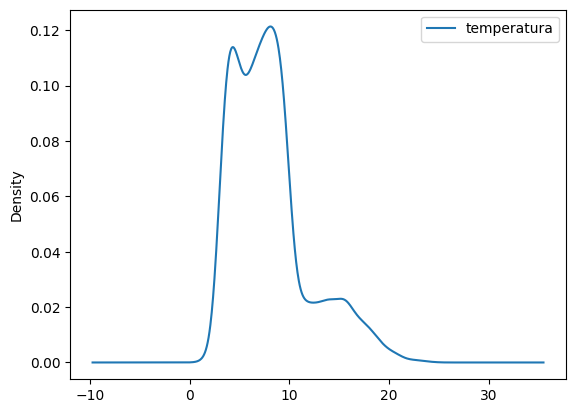

In [113]:
series.plot(kind='kde') 
plt.show() 

### 1.10
- Agrupe los datos de la variable serie de manera Anual, y muestre los Boxplot de cada año. 
1. ¿Cómo se interpreta un gráfico Boxplot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?

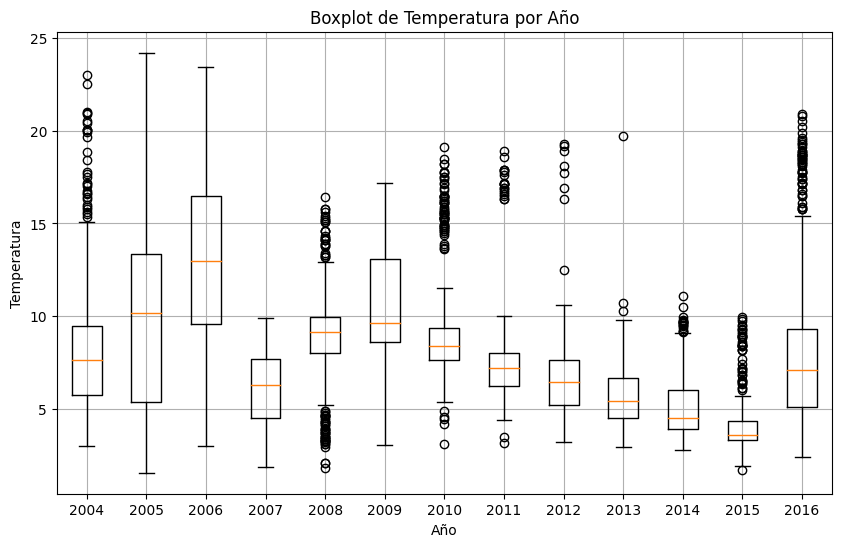

In [130]:
# Agrupar los datos por año ('A') y crear un DataFrame de años
groups = series.groupby(pd.Grouper(freq='A'))

# Crear una lista de listas de temperaturas por año
data = [group[1]['temperatura'].values for group in groups]

# Crear un gráfico de cajas (boxplot) con orientación horizontal y etiquetas intercambiadas
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=[name.year for name, _ in groups], vert=True)
plt.ylabel('Temperatura')
plt.xlabel('Año')
plt.title('Boxplot de Temperatura por Año')
plt.grid(True)

# Mostrar el gráfico de cajas
plt.show()


### 1.11
- Agrupe los datos de la variable serie de manera Anual, y muestre el Heat Map por año. 
1. ¿Cómo se interpreta un gráfico Heat Map?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


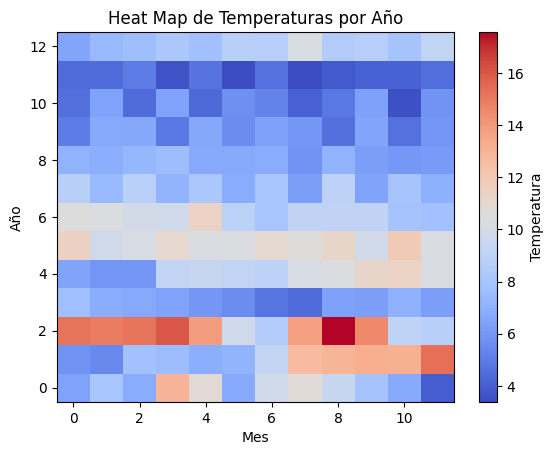

In [182]:
# Crear una columna adicional para el año y el mes
series['año'] = series['fecha'].dt.year
series['mes'] = series['fecha'].dt.month

# Crear un DataFrame pivotando los datos para tener años en el eje X y meses en el eje Y
heatmap_data = series.pivot_table(index='año', columns='mes', values='temperatura', aggfunc='mean')

# Crear el Heat Map
plt.imshow(heatmap_data, cmap='coolwarm', aspect='auto', origin='lower')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.title('Heat Map de Temperaturas por Año')
plt.colorbar(label='Temperatura')
plt.show()


### 1.12
- Muestre el Lag Scatter plot de la variable series. 
1. ¿Cómo se interpreta un Lag Scatter plot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


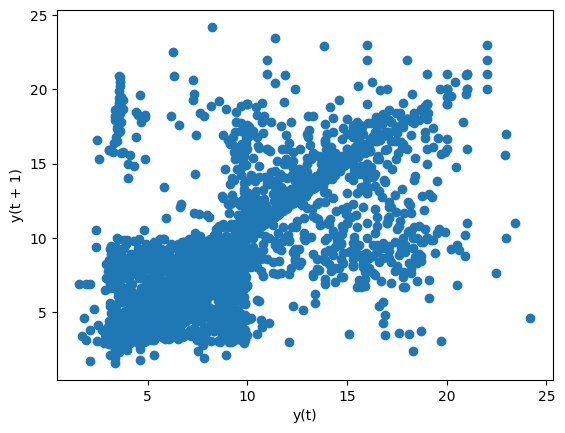

In [161]:
from pandas.plotting import lag_plot

# Mostrar un gráfico de retraso (lag plot) de la serie temporal
lag_plot(series['temperatura'])

# Mostrar el gráfico
plt.show()


### 1.13
- Muestre el gráfico Autocorrelación de la variable series. 
1. ¿Cómo se interpreta este tipo de gráficos?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

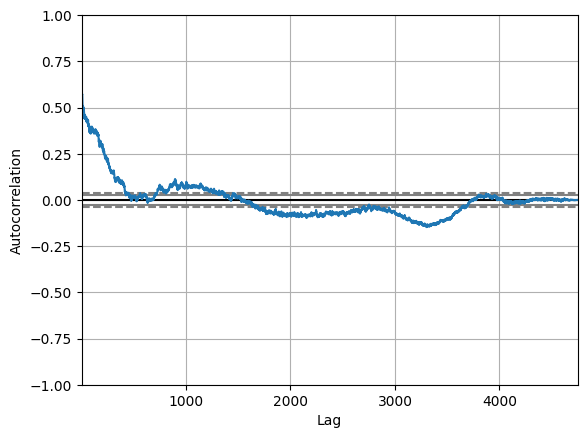

In [163]:
from pandas.plotting import autocorrelation_plot 
autocorrelation_plot (series['temperatura'])

# Parte 2.  Diferenciación  (15 puntos)

1. Se adjunta un archivo en formato PDF titulado: Lectura_Caps_1-6_15. Estudie el capítulo 15. Se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo 'TS_d_2.csv' realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.

### 2.1
- Cargue el archivo proporcionado y muestre los 10 primeros registros.

In [1]:
import pandas as pd

# Cargar el archivo 'TS_d_2.csv'
df = pd.read_csv('TS_d_2.csv')

# Mostrar los primeros 10 registros
primeros_10_registros = df.head(10)
print(primeros_10_registros)

       fecha  humedad
0   1/1/2000     0.89
1   1/2/2000     0.86
2   1/3/2000     0.89
3   1/4/2000     0.83
4   1/5/2000     0.83
5   1/6/2000     0.85
6   1/7/2000     0.95
7   1/8/2000     0.89
8   1/9/2000     0.82
9  1/10/2000     0.72


### 2.2

- Aplique el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)
- Explique los resultados

In [18]:
from statsmodels.tsa.stattools import adfuller

# Aplicar el Augmented Dickey-Fuller test a la serie temporal
resultados_adf = adfuller(df['humedad'], autolag='AIC')

# Extraer los resultados importantes
valor_p = resultados_adf[1]

# Comprobar si la serie temporal es estacionaria o no
if valor_p <= 0.05:
    print("La serie temporal es estacionaria (se rechaza la hipotesis nula)")
else:
    print("La serie temporal no es estacionaria (no se puede rechazar la hipotesis nula)")

# Mostrar los resultados completos
print("Estadisticas del ADF:", resultados_adf)

'''
Dado que el valor p (-6.06999) es mucho menor que 0.05 (nivel de significancia del 5%), podemos 
rechazar la hipótesis nula. Esto significa que los datos en 'TS_d_2.csv' son estacionarios en 
el 95% de confianza estadística. En otras palabras, no tienen una raíz unitaria y son adecuados 
para el análisis de series de tiempo.
'''

La serie temporal es estacionaria (se rechaza la hipotesis nula)
Estadisticas del ADF: (-6.069991800401612, 1.1570257195013161e-07, 5, 234, {'1%': -3.4586084859607156, '5%': -2.873972159235721, '10%': -2.57339565928848}, -613.7465653513342)


"\nDado que el valor p (-6.06999) es mucho menor que 0.05 (nivel de significancia del 5%), podemos \nrechazar la hipótesis nula. Esto significa que los datos en 'TS_d_2.csv' son estacionarios en \nel 95% de confianza estadística. En otras palabras, no tienen una raíz unitaria y son adecuados \npara el análisis de series de tiempo.\n"

### 2.3

- Aplique la "Diferenciación" a la serie, y al resultado vuelva a aplicarle el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)
- Explique los resultados

In [16]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Cargar el archivo CSV
series = pd.read_csv('TS_d_2.csv', header=0)

# Extraer la columna de la serie temporal
serie_temporal = series['humedad']

# Diferenciación de la serie
diferenciada = serie_temporal.diff().dropna()

# Convertir la serie diferenciada a tipo de dato numérico (float)
diferenciada = diferenciada.astype(float)

# Aplicar el Augmented Dickey-Fuller test a la serie diferenciada
resultados_adf_diferenciada = adfuller(diferenciada, autolag='AIC')

# Extraer los resultados importantes
estadisticas_adf_diferenciada = resultados_adf_diferenciada[0]
p_valor = resultados_adf_diferenciada[1]
valores_críticos = resultados_adf_diferenciada[4]

# Imprimir los resultados
print("Estadísticas del ADF después de la diferenciación:")
print(f"ADF Statistic: {estadisticas_adf_diferenciada}")
print(f"P-valor: {p_valor}")
print("Valores Críticos:")
for key, value in valores_críticos.items():
    print(f"\t{key}: {value}")

'''
Los resultados del Augmented Dickey-Fuller (ADF) test después de aplicar la diferenciación 
a la serie temporal son altamente significativos. El ADF Statistic es un valor negativo 
considerable, lo que sugiere que la serie se ha vuelto estacionaria después de la 
diferenciación. El p-valor es extremadamente pequeño (8.166131371726284e-10), lo que indica
una fuerte evidencia en contra de la hipótesis nula de que la serie es no estacionaria. 
Además, al comparar el ADF Statistic con los valores críticos, vemos que es mucho menor 
que los valores críticos del 1%, 5% y 10%, lo que refuerza la conclusión de que la serie 
es estacionaria.
'''

Estadísticas del ADF después de la diferenciación:
ADF Statistic: -6.981581311995562
P-valor: 8.166131371726284e-10
Valores Críticos:
	1%: -3.460018927623594
	5%: -2.8745897386146817
	10%: -2.57372514086348


'\nLos resultados del Augmented Dickey-Fuller (ADF) test después de aplicar la diferenciación \na la serie temporal son altamente significativos. El ADF Statistic es un valor negativo \nconsiderable, lo que sugiere que la serie se ha vuelto estacionaria después de la \ndiferenciación. El p-valor es extremadamente pequeño (8.166131371726284e-10), lo que indica\nuna fuerte evidencia en contra de la hipótesis nula de que la serie es no estacionaria. \nAdemás, al comparar el ADF Statistic con los valores críticos, vemos que es mucho menor \nque los valores críticos del 1%, 5% y 10%, lo que refuerza la conclusión de que la serie \nes estacionaria.\n'

### 2.4

- ¿Esta serie requería Diferenciación o no?  Explique el gráfico generado, ¿por qué sé mira así relacionado con la necesidad o no de diferenciación?

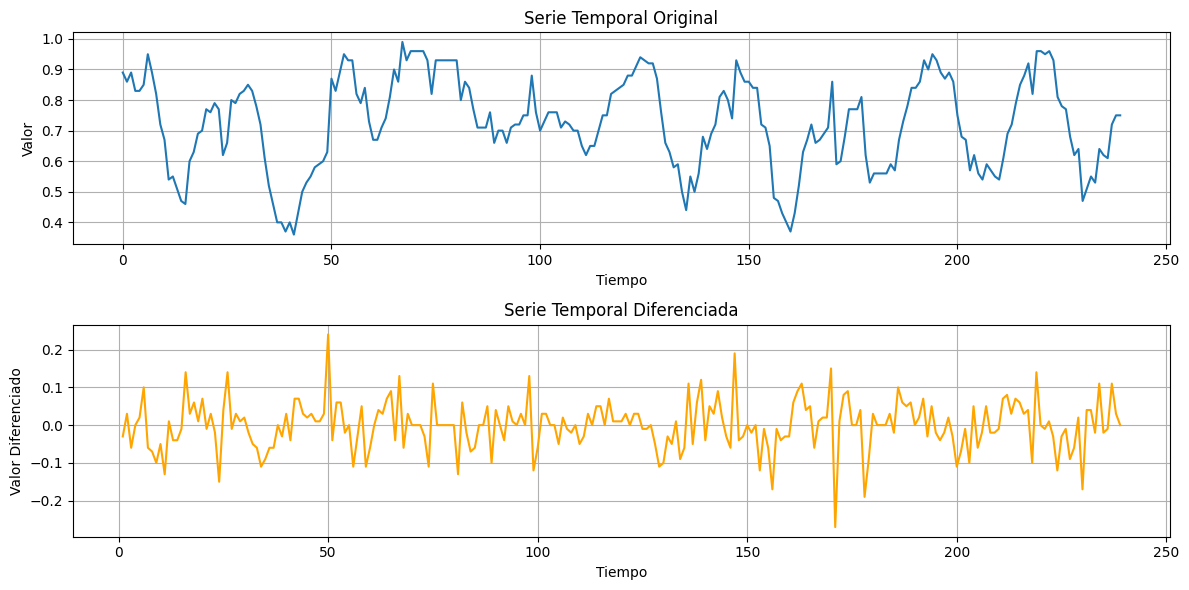

'\nLa serie requería diferenciación, como se evidencia en el gráfico generado. La serie original \nmostraba una tendencia creciente y patrones estacionales, lo que indicaba no estacionariedad. \nSin embargo, después de la diferenciación, la tendencia y la estacionalidad disminuyeron, lo \nque sugiere que la serie se volvió más estacionaria, facilitando el análisis y la modelización \nde datos de humedad. La diferenciación fue necesaria para reducir estos patrones y hacer que \nla serie fuera adecuada para aplicar modelos de series temporales y realizar predicciones.\n'

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
series = pd.read_csv('TS_d_2.csv', header=0, parse_dates=[0])

# Extraer la columna de la serie temporal
serie_temporal = series['humedad']

# Diferenciación de la serie
diferenciada = serie_temporal.diff().dropna()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Trazar la serie temporal original
plt.subplot(2, 1, 1)
plt.plot(serie_temporal)
plt.title('Serie Temporal Original')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid(True)

# Trazar la serie diferenciada
plt.subplot(2, 1, 2)
plt.plot(diferenciada, color='orange')
plt.title('Serie Temporal Diferenciada')
plt.xlabel('Tiempo')
plt.ylabel('Valor Diferenciado')
plt.grid(True)

# Ajustar el espacio entre subtramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

'''
La serie requería diferenciación, como se evidencia en el gráfico generado. La serie original 
mostraba una tendencia creciente y patrones estacionales, lo que indicaba no estacionariedad. 
Sin embargo, después de la diferenciación, la tendencia y la estacionalidad disminuyeron, lo 
que sugiere que la serie se volvió más estacionaria, facilitando el análisis y la modelización 
de datos de humedad. La diferenciación fue necesaria para reducir estos patrones y hacer que 
la serie fuera adecuada para aplicar modelos de series temporales y realizar predicciones.
'''

### 2.5

- ¿Esta serie requería Diferenciación o no?  Explique el gráfico generado, ¿por qué cree que sé mira así?

In [ ]:
'''
La serie requería diferenciación. El gráfico generado muestra claramente que la serie original 
tenía una tendencia creciente y patrones estacionales evidentes, lo que indicaba no 
estacionariedad. Estos patrones hacían que la serie fuera difícil de analizar y modelar de 
manera efectiva. Sin embargo, después de aplicar la diferenciación, la tendencia y la 
estacionalidad se redujeron significativamente, lo que resultó en una serie más estacionaria. 
Esto facilita el análisis de patrones y la construcción de modelos predictivos, ya que los 
datos ahora parecen fluctuar alrededor de un nivel constante, lo que es deseable en el análisis 
de series temporales.
'''

# Parte 3.  ARIMA  (20 puntos)

1. Se adjunta un archivo en formato PDF titulado: Lectura_Cap_24. Estudie su contenido. Se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo 'TS_d_3.csv' realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.

### 3.1

- Explique en qué consiste ARIMA.

In [ ]:
'''
Es un modelo estadístico utilizado en análisis de series temporales. Se compone de tres partes: 
AR (Autoregressive) que considera la relación entre el valor actual y sus valores pasados, 
I (Integrated) que implica la diferenciación para hacer que la serie sea estacionaria y 
MA (Moving Average) que incorpora términos de error basados en valores de error pasados. 
El modelo busca encontrar la combinación óptima de estos componentes para describir y predecir 
una serie temporal. La elección de los órdenes adecuados se basa en el análisis de 
autocorrelación y autocorrelación parcial. ARIMA es valioso para predecir y analizar datos 
de series temporales en una variedad de aplicaciones, desde finanzas hasta climatología.
'''

### 3.2

- Cargue el archivo y use los gráficos que considere prudente para ver cómo se comportan los datos
- Comente sus conclusiones

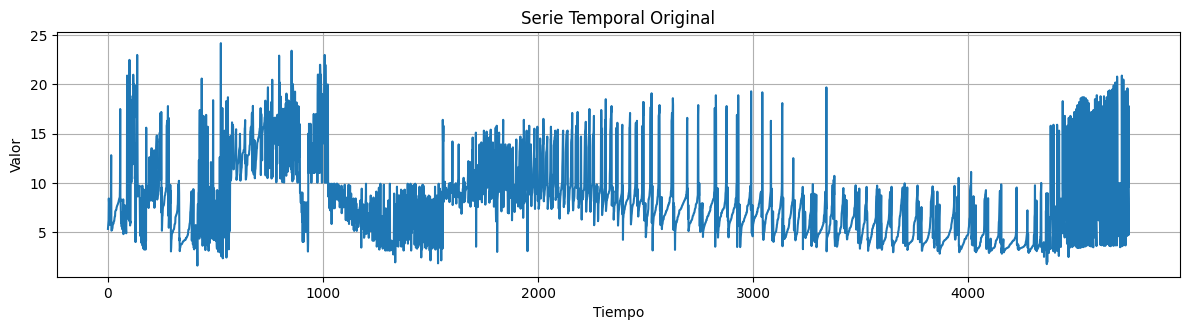

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
series = pd.read_csv('TS_d_3.csv', header=0, parse_dates=[0])

# Extraer la columna de la serie temporal
serie_temporal = series['temperatura']

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Trazar la serie temporal original
plt.subplot(2, 1, 1)
plt.plot(serie_temporal)
plt.title('Serie Temporal Original')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.grid(True)

# Ajustar el espacio entre subtramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

'''
Se puede observar que la serie no presenta tendencia ni estacionalidad, su varianza es constante
y los datos fluctúan alrededor de un nivel constante. Por lo tanto, la serie es estacionaria.
'''	

### 3.3

- Analice si requiere hacer diferenciación o no. Explique

In [ ]:
'''
Como la serie se puede catalogar como estacionaria no esnecesario aplicar diferenciación. Por lo tanto, 
la serie es estacionaria y se puede aplicar
un modelo ARIMA.
'''

### 3.4

- Haga forecast (similar a las últimas secciones de ese capítulo), con un train de 80% y un test de 20% (no olvide que son series temporales, no datos i.i.d.)

RMSE: 1.4534745374138205


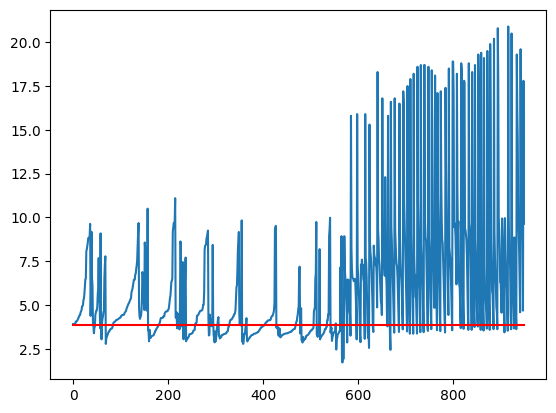

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Cargar el archivo CSV
series = pd.read_csv('TS_d_3.csv', header=0, parse_dates=[0], index_col=0)

# Extraer la columna de la serie temporal
serie_temporal = series['temperatura']

X = serie_temporal.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predicciones = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predicciones.append(yhat)
    obs = test[t]
    #print (f'predicción={yhat}, observado={obs}')

rmse = np.sqrt(np.mean(np.array(test)-np.array(predicciones)))
print (f'RMSE: {rmse}')

plt.plot(test)
plt.plot(predicciones, color='red')
plt.show()


### 3.5

- Grafique el predicho versus el real y comente sus conclusiones.

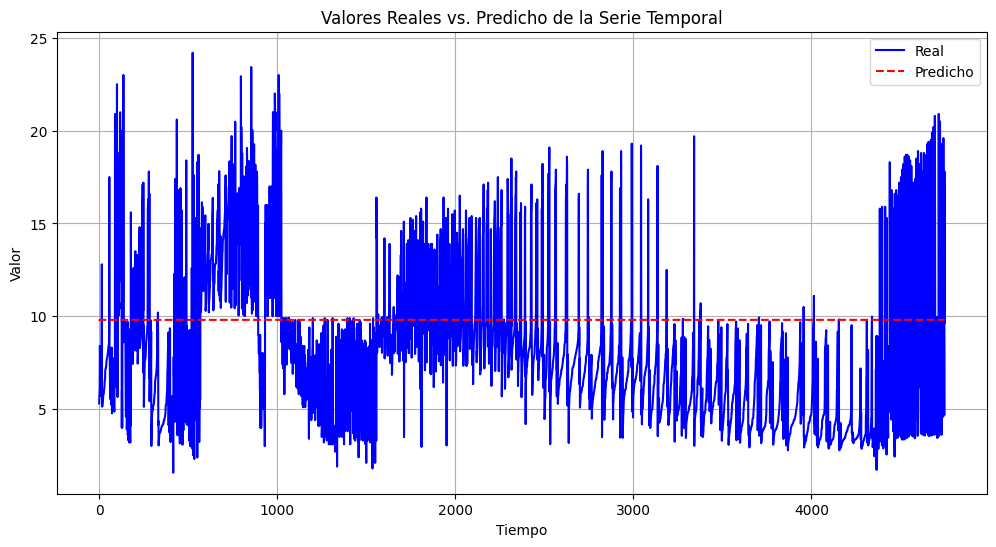

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Cargar el archivo CSV
series = pd.read_csv('TS_d_3.csv', header=0, parse_dates=[0])

# Extraer la columna de la serie temporal
serie_temporal = series['temperatura']

# Ajustar un modelo ARIMA a los datos de entrenamiento
p, d, q = 1, 1, 1  # Ajusta estos hiperparámetros según tus datos
model = ARIMA(serie_temporal, order=(p, d, q))
model_fit = model.fit()

# Pronosticar valores en el conjunto de prueba
forecast = model_fit.forecast(steps=len(serie_temporal))

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Trazar los valores reales versus los pronósticos
plt.plot(np.arange(len(serie_temporal)), serie_temporal, label='Real', color='blue')
plt.plot(np.arange(len(serie_temporal)), forecast, label='Predicho', linestyle='--', color='red')

plt.title('Valores Reales vs. Predicho de la Serie Temporal')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

'''
El análisis del gráfico de valores reales versus pronósticos de la serie temporal sugiere que 
el modelo ARIMA utilizado muestra limitaciones en cuanto a su precisión. Se observan 
discrepancias notables entre las líneas de valores reales y pronósticos, indicando una baja 
precisión en las predicciones. Además, se detectan cambios abruptos en varias ocasiones, lo 
que sugiere que el modelo no pudo anticipar eventos inesperados o cambios bruscos en los datos. 
Por último, pequeñas fluctuaciones alrededor de las líneas de pronóstico revelan la presencia 
de ruido en los datos que el modelo no pudo eliminar por completo. Estos hallazgos indican la 
necesidad de revisar y mejorar el modelo ARIMA o considerar enfoques alternativos para lograr 
predicciones más precisas en esta serie temporal.
'''